Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -32.8    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 204      |
|    time_elapsed    | 19       |
|    total_timesteps | 3996     |
| train/             |          |
|    actor_loss      | -7.96    |
|    critic_loss     | 0.000537 |
|    ent_coef        | 0.224    |
|    ent_coef_loss   | -2.53    |
|    learning_rate   | 0.001    |
|    n_updates       | 1496     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -28.1    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 169      |
|    time_elapsed    | 47       |
|    total_timesteps | 7992     |
| train/             |          |
|    actor_loss      | -6.21    |
|    critic_loss     | 5.1e-05 

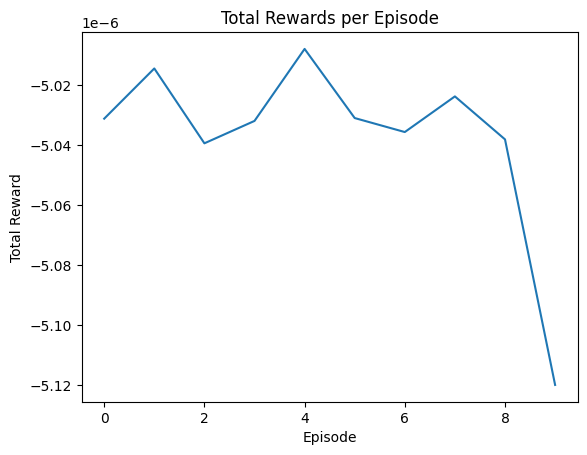

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import SAC
from stable_baselines3.common.env_util import make_vec_env

# Create the environment
env = gym.make('MountainCarContinuous-v0')
env = make_vec_env(lambda: env, n_envs=1)

# Initialize the SAC agent with some custom hyperparameters
model = SAC("MlpPolicy", env, learning_rate=1e-3, buffer_size=100000, learning_starts=1000, batch_size=64, tau=0.02, gamma=0.99, train_freq=4, gradient_steps=2, verbose=1)

# Train the agent for longer
model.learn(total_timesteps=50000)

# Evaluate the agent
episode_rewards = []
for _ in range(10):
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, _ = env.step(action)
        total_reward += reward
    episode_rewards.append(total_reward)

# Calculate and print mean and standard deviation of rewards
mean_reward = np.mean(episode_rewards)
std_reward = np.std(episode_rewards)
print(f"Mean Reward: {mean_reward}, Standard Deviation of Reward: {std_reward}")

# Plotting the rewards
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Rewards per Episode')
plt.show()

env.close()
